In [7]:
# 参考URL https://blog.amedama.jp/entry/2017/03/19/160121
# -*- coding: utf-8 -*-

from matplotlib import pyplot as plt
from sklearn import datasets
import numpy as np
# jupyter notebookで図を表示したいので
%matplotlib inline 

In [8]:
class KMeans(object):
    def __init__(self, n_clusters=2, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.cluster_centers_ = None

    def fit_predict(self, features):
        # 要素の中からセントロイド (重心) の初期値となる候補をクラスタ数だけ選び出す
        feature_indexes = np.arange(len(features))
        np.random.shuffle(feature_indexes)
        initial_centroid_indexes = feature_indexes[:self.n_clusters]
        self.cluster_centers_ = features[initial_centroid_indexes]

        # ラベル付けした結果となる配列はゼロで初期化しておく
        pred = np.zeros(features.shape)

        # クラスタリングをアップデートする
        for _ in range(self.max_iter):
            # 各要素から最短距離のセントロイドを基準にラベルを更新する
            new_pred = np.array([
                np.array([
                    self._euclidean_distance(p, centroid)
                    for centroid in self.cluster_centers_
                ]).argmin()
                for p in features
            ])

            if np.all(new_pred == pred):
                # 更新前と内容が同じなら終了
                break

            pred = new_pred

            # 各クラスタごとにセントロイド (重心) を再計算する
            self.cluster_centers_ = np.array([features[pred == i].mean(axis=0)
                                              for i in range(self.n_clusters)])

        return pred

    def _euclidean_distance(self, p0, p1):
        return np.sum((p0 - p1) ** 2)

/Users/saita/.pyenv/versions/anaconda3-5.2.0/envs/opencv_conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


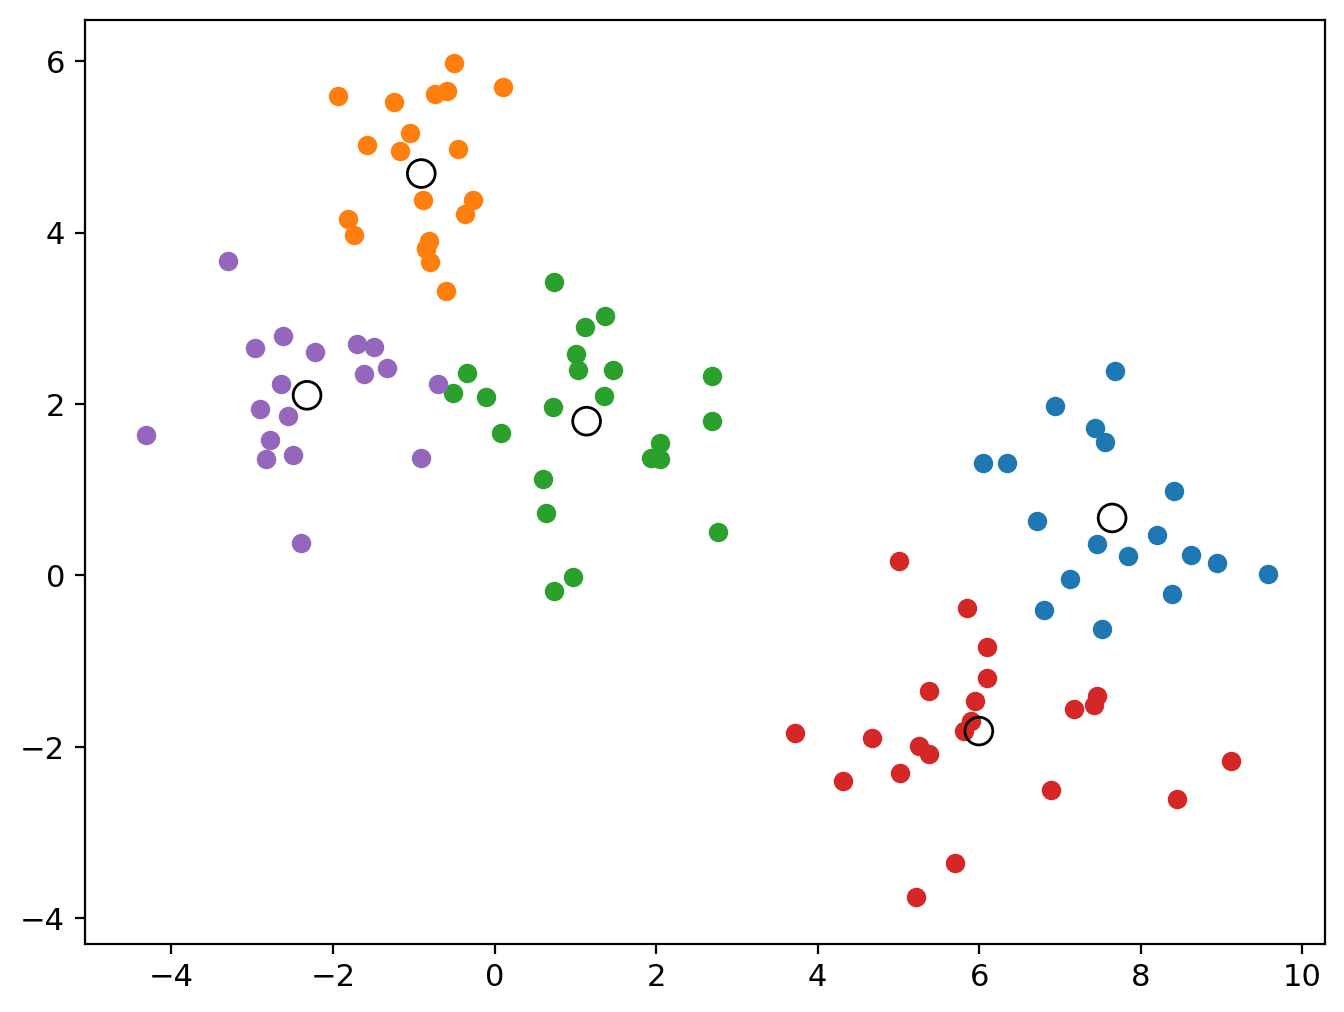

In [9]:
def main():
    # クラスタ数
    N_CLUSTERS = 5

    # Blob データを生成する
    dataset = datasets.make_blobs(centers=N_CLUSTERS)

    # 特徴データ
    features = dataset[0]
    # 正解ラベルは使わない
    # targets = dataset[1]

    # クラスタリングする
    cls = KMeans(n_clusters=N_CLUSTERS)
    pred = cls.fit_predict(features)
    fig = plt.figure(figsize=(8, 6))
    # 余白を設定
    plt.subplots_adjust(wspace=0.2, hspace=0.3)
    plt.rcParams['font.family'] = 'DejaVu Sans'    # 2種類の分散で実行
    # 各要素をラベルごとに色付けして表示する
    for i in range(N_CLUSTERS):
        labels = features[pred == i]
        plt.scatter(labels[:, 0], labels[:, 1])

    centers = cls.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], s=100,
                facecolors='none', edgecolors='black')

    plt.show()


if __name__ == '__main__':
    main()